# Working with Audio

## Mengimpor Library

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np

Sumber audio .wav didapat dari : https://www.kaggle.com/datasets/pavanelisetty/sample-audio-files-for-speech-recognition?resource=download

---

## Audio Visualization

### Waveforms

#### Deskripsi

**Apa Itu Waveform?**

**Waveform** adalah representasi visual dari gelombang suara atau sinyal audio dalam domain waktu. Dalam grafik waveform, sumbu horizontal (x) biasanya mewakili waktu, sedangkan sumbu vertikal (y) mewakili amplitudo sinyal audio pada waktu tertentu. Dengan kata lain, waveform menunjukkan bagaimana amplitudo suara berubah seiring berjalannya waktu.

Waveform memberikan informasi penting tentang karakteristik audio, seperti:
- **Amplitudo**: Ketinggian atau intensitas gelombang suara. Amplitudo tinggi biasanya terkait dengan suara yang lebih keras.
- **Frekuensi**: Jumlah siklus gelombang per detik. Meskipun waveform sendiri tidak langsung menunjukkan frekuensi, pola-pola dalam waveform bisa memberikan indikasi tentang frekuensi sinyal.
- **Durasi**: Panjang waktu sinyal audio.

**Tentang Package `wave`**

`import wave` adalah modul dalam Python yang digunakan untuk membaca dan menulis file audio dalam format WAV. Format WAV adalah format audio yang tidak terkompresi, yang berarti data audio disimpan dalam bentuk aslinya tanpa pengurangan kualitas.

In [2]:
import wave

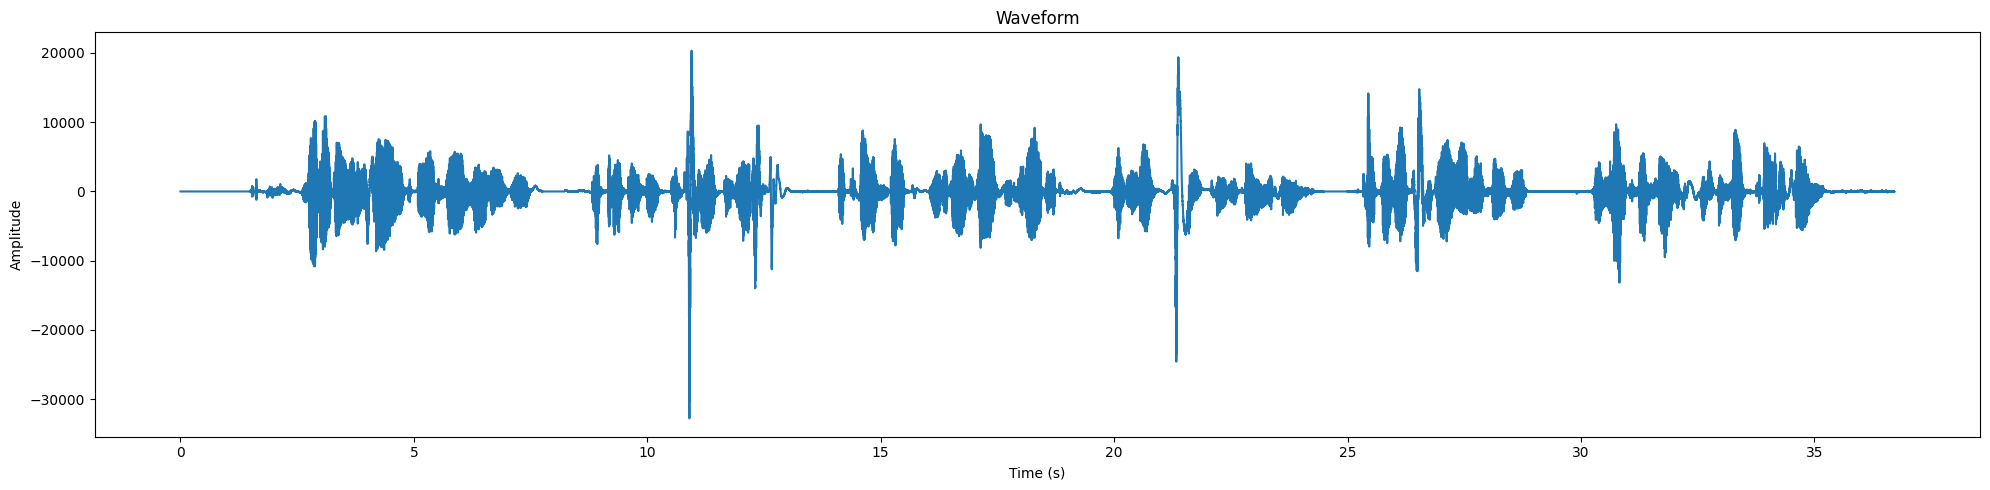

In [3]:
file_path = os.path.join(os.getcwd(), 'data', 'harvard.wav')
with wave.open(file_path, 'r') as wav_file:
    frames = wav_file.readframes(-1)
    sound_info = np.frombuffer(frames, dtype=np.int16)
    frame_rate = wav_file.getframerate()
    time = np.linspace(0, len(sound_info) / frame_rate, num=len(sound_info))
    
    plt.figure(figsize=(20, 5))
    plt.plot(time, sound_info)
    plt.title('Waveform')
    plt.ylabel('Amplitude')
    plt.xlabel('Time (s)')
    plt.tight_layout()
    plt.show()

#### Penjelasan Kode

Kode berikut digunakan untuk memvisualisasikan waveform dari file audio berformat WAV. Langkah-langkah yang dilakukan dalam kode ini adalah:

1. **Menentukan Path File Audio**:
   ```python
   file_path = os.path.join(os.getcwd(), 'data', 'harvard.wav')
   ```
   Baris ini menentukan path lengkap dari file audio `harvard.wav` yang berada di dalam folder `data`. Path lengkap diperoleh dengan menggabungkan direktori kerja saat ini (`os.getcwd()`) dengan `data/harvard.wav`.

2. **Membuka File Audio**:
   ```python
   with wave.open(file_path, 'r') as wav_file:
   ```
   Kode ini membuka file audio `harvard.wav` dalam mode baca (`'r'`). 

3. **Membaca Frame Audio**:
   ```python
   frames = wav_file.readframes(-1)
   ```
   Baris ini membaca semua frame dari file audio.

4. **Mengubah Frame Menjadi Array NumPy**:
   ```python
   sound_info = np.frombuffer(frames, dtype=np.int16)
   ```
   Frame audio yang dibaca dikonversi menjadi array NumPy dengan tipe data `int16`.

5. **Mendapatkan Frame Rate**:
   ```python
   frame_rate = wav_file.getframerate()
   ```
   Kode ini mendapatkan nilai frame rate dari file audio.

6. **Membuat Vektor Waktu**:
   ```python
   time = np.linspace(0, len(sound_info) / frame_rate, num=len(sound_info))
   ```
   Vektor waktu dibuat berdasarkan panjang data audio dan frame rate, untuk digunakan sebagai sumbu x pada plot.

7. **Memvisualisasikan Waveform**:
   - `plt.figure(figsize=(20, 5))`: Membuat figure dengan ukuran 20x5 inci.
   - `plt.plot(time, sound_info)`: Memplot data audio dengan sumbu x sebagai waktu dan sumbu y sebagai amplitudo.
   - `plt.title('Waveform')`: Memberi judul plot "Waveform".
   - `plt.ylabel('Amplitude')`: Memberi label sumbu y dengan "Amplitude".
   - `plt.xlabel('Time (s)')`: Memberi label sumbu x dengan "Time (s)".
   - `plt.tight_layout()`: Menyesuaikan layout plot agar lebih rapi.
   - `plt.show()`: Menampilkan plot.


---

### Spectogram

#### Deskripsi
**Spectrogram (Spektrogram)**

Spektrogram adalah representasi visual dari spektrum frekuensi sebuah sinyal sebagai fungsi waktu. Ini adalah alat yang sangat berguna untuk menganalisis karakteristik frekuensi dari sinyal audio, terutama karena sinyal audio umumnya memiliki komponen frekuensi yang bervariasi dari waktu ke waktu.

**Bagaimana Spektrogram Bekerja:**
1. **Transformasi Fourier Cepat (FFT)**: Untuk membuat spektrogram, sinyal audio pertama-tama dipecah menjadi segmen-segmen pendek yang saling tumpang tindih. FFT kemudian diterapkan pada masing-masing segmen untuk menghitung spektrum frekuensi.
2. **Representasi Waktu-Frekuensi**: Hasil FFT untuk masing-masing segmen kemudian digabungkan menjadi representasi dua dimensi dari waktu (sumbu horizontal) dan frekuensi (sumbu vertikal). 
3. **Amplitudo**: Amplitudo atau kekuatan frekuensi pada titik waktu tertentu biasanya diwakili oleh warna atau intensitas pada spektrogram. Nilai amplitudo ini sering dikonversi ke skala desibel (dB) untuk lebih mudah dibaca.

Spektrogram memungkinkan kita untuk melihat bagaimana frekuensi komponen dari sinyal berubah seiring waktu, yang sangat berguna dalam berbagai aplikasi seperti pengenalan suara, analisis musik, dan pemrosesan sinyal lainnya.

**Librosa**

`librosa` adalah pustaka Python untuk analisis audio dan musik. Ini menyediakan berbagai alat untuk bekerja dengan sinyal audio, termasuk fungsi untuk memuat audio, menghitung berbagai representasi spektrum, dan mengekstraksi fitur audio.

**Fitur Utama Librosa:**
1. **Pemrosesan Sinyal Audio**: `librosa` menyediakan fungsi untuk memuat dan memanipulasi sinyal audio, seperti pemuatan file audio, perubahan kecepatan sampling, dan pemotongan sinyal.
2. **Representasi Spektrum**: `librosa` dapat menghitung berbagai representasi spektrum dari sinyal audio, termasuk spektrogram, spektrogram log-frekuensi, dan mel-spectrogram.
3. **Ekstraksi Fitur**: `librosa` memungkinkan pengguna untuk mengekstrak berbagai fitur audio seperti tempo, nada dasar (pitch), dan spektrum kecepatan.
4. **Visualisasi**: `librosa.display` adalah modul dalam `librosa` yang menyediakan fungsi untuk memvisualisasikan representasi spektrum dan fitur audio lainnya.

In [4]:
import librosa
import librosa.display

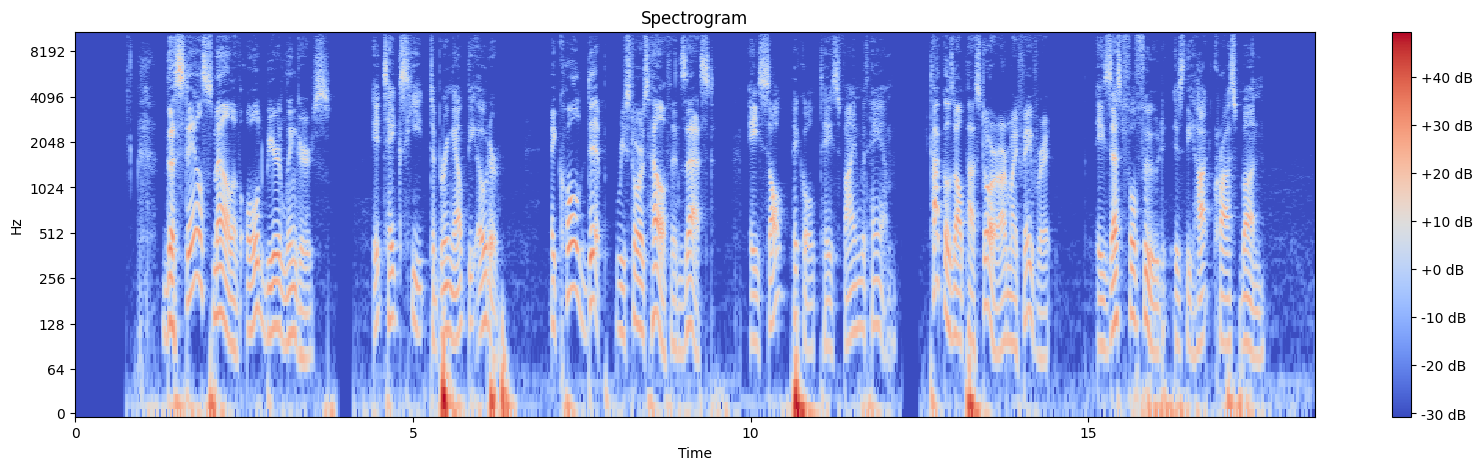

In [5]:
file_path = os.path.join(os.getcwd(), 'data', 'harvard.wav')
y, sr = librosa.load(file_path)
plt.figure(figsize=(20, 5))
S = librosa.stft(y)
S_db = librosa.amplitude_to_db(abs(S))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

#### Penjelasan Kode

```python
y, sr = librosa.load(file_path)
```

Librosa memuat file audio, dan mengembalikan dua nilai:
- `y`: Array yang berisi data amplitudo dari sinyal audio.
- `sr`: Sampling rate (jumlah sampel per detik).

```python
plt.figure(figsize=(20, 5))
```

Membuat sebuah figure untuk plot dengan ukuran 20x5 inci.

```python
S = librosa.stft(y)
```

Menghitung Short-Time Fourier Transform (STFT) dari sinyal audio `y`, yang menghasilkan representasi frekuensi-waktu dari sinyal.

```python
S_db = librosa.amplitude_to_db(abs(S))
```

Mengonversi nilai amplitudo dari STFT ke skala desibel (dB) untuk representasi yang lebih mudah dipahami.

```python
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log')
```

Menampilkan spektrogram menggunakan `librosa.display.specshow`, dengan:
- `S_db` sebagai data yang ditampilkan.
- `sr` sebagai sampling rate untuk sumbu waktu.
- `x_axis='time'` untuk menampilkan waktu di sumbu x.
- `y_axis='log'` untuk menampilkan frekuensi dalam skala logaritmik di sumbu y.

```python
plt.colorbar(format='%+2.0f dB')
```


---

### Mel Spectrogram

#### Deskripsi

**Apa itu Mel Spectrogram?**

Mel spectrogram adalah representasi visual dari spektrum frekuensi audio yang diubah menggunakan skala Mel. Skala Mel adalah skala frekuensi yang lebih sesuai dengan persepsi manusia terhadap suara. Manusia tidak mendengar frekuensi secara linier; kita lebih peka terhadap perubahan frekuensi di daerah bawah (rendah) daripada di daerah atas (tinggi). Oleh karena itu, skala Mel dirancang untuk mencerminkan bagaimana manusia sebenarnya mendengar.

**Mengapa Menggunakan Mel Spectrogram?**

Mel spectrogram sering digunakan dalam berbagai aplikasi pengolahan audio, seperti pengenalan suara, analisis musik, dan pemrosesan sinyal audio, karena lebih sesuai dengan persepsi pendengaran manusia. Beberapa kelebihan Mel spectrogram adalah:
- **Lebih representatif terhadap pendengaran manusia**: Membantu algoritma pengenalan suara dan musik bekerja lebih baik.
- **Pemisahan frekuensi yang lebih baik**: Lebih efektif dalam menunjukkan fitur penting dalam audio.

**Interpretasi Mel Spectrogram**

Pada Mel spectrogram:
- **Sumbu X**: Menunjukkan waktu.
- **Sumbu Y**: Menunjukkan frekuensi dalam skala Mel.
- **Warna**: Menunjukkan amplitudo atau kekuatan sinyal pada frekuensi dan waktu tertentu, diukur dalam dB (decibel).

Mel spectrogram memberikan representasi yang lebih jelas tentang bagaimana energi spektrum didistribusikan dalam frekuensi yang berbeda sesuai dengan pendengaran manusia. Ini sangat berguna untuk menganalisis pola suara, seperti formant dalam pengucapan atau nada dasar dalam musik.


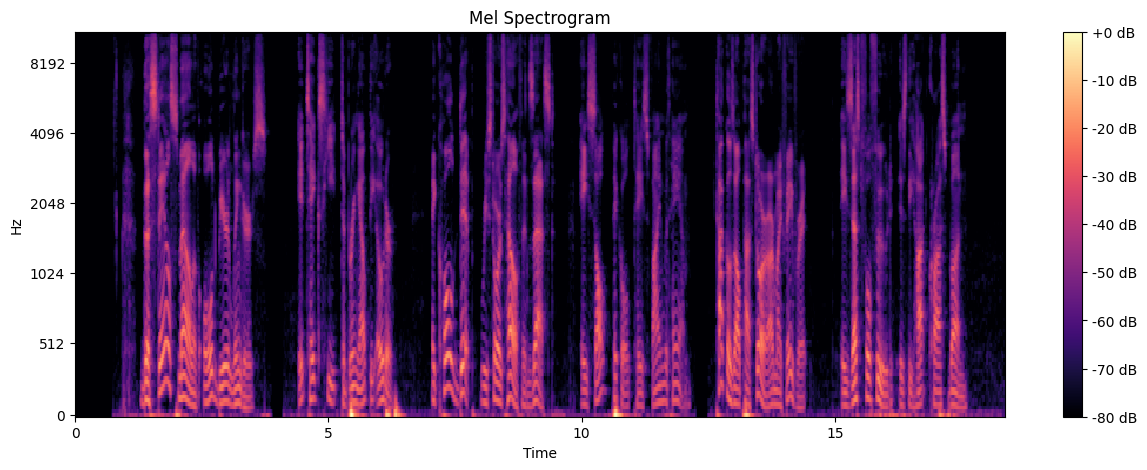

In [6]:
file_path = os.path.join(os.getcwd(), 'data', 'harvard.wav')
y, sr = librosa.load(file_path)
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
S_db = librosa.power_to_db(S, ref=np.max)
plt.figure(figsize=(15, 5))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.show()

---

## Tugas: `ho1`

1. Buktikan bahwa terdapat perbedaan yang signifikan pada visualisasi audio menggunakan sumber audio yang relatif bersuara pelan, relatif bersuara dengan volume sedang, dan relatif bersuara dengan volume tinggi.
    - Masing-masing silahkan mencari file wav/mp3/flac yang sesuai dengan ketentuan tersebut (3 file).
    - Gunakan waveforms dan spectogram untuk memvisualisasikan ketiga sumber audio tersebut.
    - Berikan analisa anda terhadap perbedaan visualisasi audio tersebut.

### Ketentuan Penamaan File
```
nim_ho1.ipynb
```

> Saya sudah mendapatkan akses ke server [MOSS Stanford](https://theory.stanford.edu/~aiken/moss/) untuk menggunakan sistem mereka dalam mata kuliah ini untuk mendeteksi code yang "plagiat". Untuk menjamin bahwa code anda tidak terindikasi plagiarisme, silahkan gunakan nama variabel / parameter / dan konfigurasi yang unik dan tidak copy paste. Dan yang terpenting, berusahalah bekerja sendiri. Jika mendapat bantuan baik dari manusia maupun AI / web, segera cantumkan dalam bagian terakhir `ipynb` anda.

### Pengumpulan
- Unggah `.ipynb` ke repositori anda.
- Paste link dari file ke google form pengumpulan tugas
- Export `.ipynb` menjadi `.pdf` dan unggah juga ke google form

Link yang di paste harus mirip dengan format berikut:
```
https://github.com/<username>/<kode_mk>/blob/master/<nim_ho1>.ipynb
```

- *Pastikan repo anda bersifat privat dan anda telah mengundang dosen pengampu ke repositori anda*
- Seluruh tugas untuk ho1 digabung dalam satu file notebook `.ipynb`
- Berikan penjelasan yang sedetail-detailnya untuk setiap bagian eksperimen yang anda lakukan

